# Torque Analysis for a 5-DOF Robotic Manipulator

# Compute Torques Due to Gravity

In [85]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [86]:

# Define the computation function using NumPy
def compute_torques(d_1_val, d_5_val, a_2_val, a_3_val, masses, inertias, angles):
    # Define symbolic variables for joint angles, DH parameters, masses, and inertia
    theta_1, theta_2, theta_3, theta_4, theta_5 = sp.symbols("theta_1 theta_2 theta_3 theta_4 theta_5")
    d_1, d_5 = sp.symbols("d_1 d_5")
    a_2, a_3 = sp.symbols("a_2 a_3")
    alpha = [90, 0, 0, 90, 0]
    m1, m2, m3, m4, m5 = sp.symbols("m1 m2 m3 m4 m5")
    g = sp.Matrix([0, 0, -9.81])

    # Define inertia matrices (assuming simple diagonal form for simplicity)
    I1_xx, I1_yy, I1_zz = sp.symbols("I1_xx I1_yy I1_zz")
    I2_xx, I2_yy, I2_zz = sp.symbols("I2_xx I2_yy I2_zz")
    I3_xx, I3_yy, I3_zz = sp.symbols("I3_xx I3_yy I3_zz")
    I4_xx, I4_yy, I4_zz = sp.symbols("I4_xx I4_yy I4_zz")
    I5_xx, I5_yy, I5_zz = sp.symbols("I5_xx I5_yy I5_zz")

    I1 = sp.diag(I1_xx, I1_yy, I1_zz)
    I2 = sp.diag(I2_xx, I2_yy, I2_zz)
    I3 = sp.diag(I3_xx, I3_yy, I3_zz)
    I4 = sp.diag(I4_xx, I4_yy, I4_zz)
    I5 = sp.diag(I5_xx, I5_yy, I5_zz)

    # Helper function to create a transformation matrix from DH parameters
    def dh_matrix(theta, d, a, alpha):
        alpha_rad = np.deg2rad(alpha)
        return sp.Matrix([
            [sp.cos(theta), -sp.sin(theta) * sp.cos(alpha_rad), sp.sin(theta) * sp.sin(alpha_rad), a * sp.cos(theta)],
            [sp.sin(theta), sp.cos(theta) * sp.cos(alpha_rad), -sp.cos(theta) * sp.sin(alpha_rad), a * sp.sin(theta)],
            [0, sp.sin(alpha_rad), sp.cos(alpha_rad), d],
            [0, 0, 0, 1]
        ])

    # Create transformation matrices
    A1 = dh_matrix(theta_1, d_1, 0, alpha[0])
    A2 = dh_matrix(theta_2, 0, a_2, alpha[1])
    A3 = dh_matrix(theta_3, 0, a_3, alpha[2])
    A4 = dh_matrix(theta_4, 0, 0, alpha[3])
    A5 = dh_matrix(theta_5, d_5, 0, alpha[4])

    # Compute the individual transformation matrices
    T1 = A1
    T2 = T1 * A2
    T3 = T2 * A3
    T4 = T3 * A4
    T5 = T4 * A5

    # Extract positions of each link's center of mass
    # Assume center of mass at the middle of each link for simplicity
    p1 = T1[:3, 3] / 2
    p2 = T2[:3, 3] / 2
    p3 = T3[:3, 3] / 2
    p4 = T4[:3, 3] / 2
    p5 = T5[:3, 3] / 2

    # Compute the Jacobians for each center of mass
    Jv1 = p1.jacobian([theta_1, theta_2, theta_3, theta_4, theta_5])
    Jv2 = p2.jacobian([theta_1, theta_2, theta_3, theta_4, theta_5])
    Jv3 = p3.jacobian([theta_1, theta_2, theta_3, theta_4, theta_5])
    Jv4 = p4.jacobian([theta_1, theta_2, theta_3, theta_4, theta_5])
    Jv5 = p5.jacobian([theta_1, theta_2, theta_3, theta_4, theta_5])

    # Compute the gravity vector for each link (assuming center of mass at the link origin)
    G1 = m1 * g
    G2 = m2 * g
    G3 = m3 * g
    G4 = m4 * g
    G5 = m5 * g

    # Compute the torques due to gravity for each link
    tau_g1 = Jv1.T * G1
    tau_g2 = Jv2.T * G2
    tau_g3 = Jv3.T * G3
    tau_g4 = Jv4.T * G4
    tau_g5 = Jv5.T * G5

    # Sum the torques due to gravity
    tau_g = tau_g1 + tau_g2 + tau_g3 + tau_g4 + tau_g5

    # Provide numerical values for testing
    values = {
        d_1: d_1_val,
        d_5: d_5_val,
        a_2: a_2_val,
        a_3: a_3_val,
        m1: masses[0],
        m2: masses[1],
        m3: masses[2],
        m4: masses[3],
        m5: masses[4],
        I1_xx: inertias[0][0],
        I1_yy: inertias[0][1],
        I1_zz: inertias[0][2],
        I2_xx: inertias[1][0],
        I2_yy: inertias[1][1],
        I2_zz: inertias[1][2],
        I3_xx: inertias[2][0],
        I3_yy: inertias[2][1],
        I3_zz: inertias[2][2],
        I4_xx: inertias[3][0],
        I4_yy: inertias[3][1],
        I4_zz: inertias[3][2],
        I5_xx: inertias[4][0],
        I5_yy: inertias[4][1],
        I5_zz: inertias[4][2],
        theta_1: angles[0],
        theta_2: angles[1],
        theta_3: angles[2],
        theta_4: angles[3],
        theta_5: angles[4],
    }

    # Compute numerical torques due to gravity
    numerical_torques = tau_g.subs(values)
    return numerical_torques


In [87]:
# Define the function to plot the torques
def plot_torques(angles_list, torques_list, title):
    fig, ax = plt.subplots()
    angles_degrees = np.rad2deg(angles_list)
    for i, torques in enumerate(zip(*torques_list)):
        ax.plot(angles_degrees, [float(torque) for torque in torques], label=f"Torque {i+1}")
    ax.set_xlabel("Joint Angles (degrees)")
    ax.set_ylabel("Torque (Nm)")
    ax.set_title(title)
    ax.legend()
    plt.show()

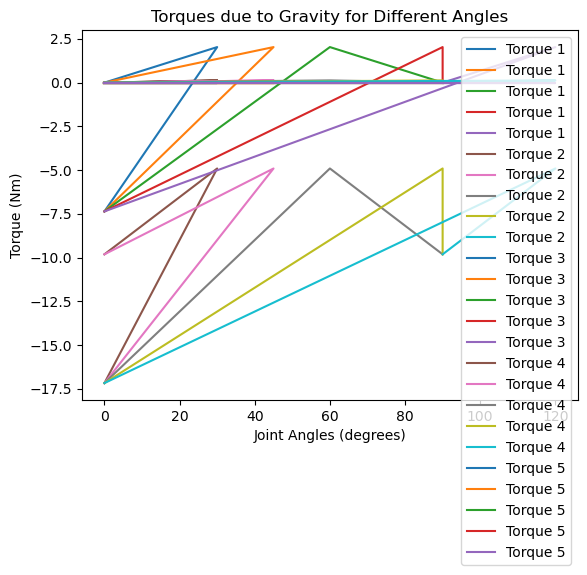

In [88]:
# Experiment with different sets of angles
d_1_val = 0.1
d_5_val = 0.1
a_2_val = 0.5
a_3_val = 0.5
masses = [1.0, 1.0, 1.0, 1.0, 1.0]
inertias = [[0.1, 0.1, 0.1], [0.1, 0.1, 0.1], [0.1, 0.1, 0.1], [0.1, 0.1, 0.1], [0.1, 0.1, 0.1]]

angles_set_1 = [0, 0, 0, 0, 0]
# angles_set_2 = [np.deg2rad(30), np.deg2rad(45), np.deg2rad(60), np.deg2rad(90), np.deg2rad(120)]
# angles_set_3 = [np.deg2rad(0), np.deg2rad(0), np.deg2rad(90), np.deg2rad(90), np.deg2rad(90)]

angles_list = [angles_set_1, angles_set_2, angles_set_3]

torques_list = []

for angles in angles_list:
    torques = compute_torques(d_1_val, d_5_val, a_2_val, a_3_val, masses, inertias, angles)
    torques_list.append([tau.evalf() for tau in torques])

plot_torques(angles_list, torques_list, "Torques due to Gravity for Different Angles")

In [89]:

# Define the function to compute and plot velocities and accelerations
def compute_velocities_accelerations(d_1_val, d_5_val, a_2_val, a_3_val, masses, inertias, angles, angle_velocities, angle_accelerations):
    # Define symbolic variables for joint angles, DH parameters, masses, and inertia
    theta_1, theta_2, theta_3, theta_4, theta_5 = sp.symbols("theta_1 theta_2 theta_3 theta_4 theta_5")
    d_1, d_5 = sp.symbols("d_1 d_5")
    a_2, a_3 = sp.symbols("a_2 a_3")
    alpha = [90, 0, 0, 90, 0]
    m1, m2, m3, m4, m5 = sp.symbols("m1 m2 m3 m4 m5")
    g = sp.Matrix([0, 0, -9.81])

    # Define inertia matrices (assuming simple diagonal form for simplicity)
    I1_xx, I1_yy, I1_zz = sp.symbols("I1_xx I1_yy I1_zz")
    I2_xx, I2_yy, I2_zz = sp.symbols("I2_xx I2_yy I2_zz")
    I3_xx, I3_yy, I3_zz = sp.symbols("I3_xx I3_yy I3_zz")
    I4_xx, I4_yy, I4_zz = sp.symbols("I4_xx I4_yy I4_zz")
    I5_xx, I5_yy, I5_zz = sp.symbols("I5_xx I5_yy I5_zz")

    I1 = sp.diag(I1_xx, I1_yy, I1_zz)
    I2 = sp.diag(I2_xx, I2_yy, I2_zz)
    I3 = sp.diag(I3_xx, I3_yy, I3_zz)
    I4 = sp.diag(I4_xx, I4_yy, I4_zz)
    I5 = sp.diag(I5_xx, I5_yy, I5_zz)

    # Helper function to create a transformation matrix from DH parameters
    def dh_matrix(theta, d, a, alpha):
        alpha_rad = np.deg2rad(alpha)
        return sp.Matrix([
            [sp.cos(theta), -sp.sin(theta) * sp.cos(alpha_rad), sp.sin(theta) * sp.sin(alpha_rad), a * sp.cos(theta)],
            [sp.sin(theta), sp.cos(theta) * sp.cos(alpha_rad), -sp.cos(theta) * sp.sin(alpha_rad), a * sp.sin(theta)],
            [0, sp.sin(alpha_rad), sp.cos(alpha_rad), d],
            [0, 0, 0, 1]
        ])

    # Create transformation matrices
    A1 = dh_matrix(theta_1, d_1, 0, alpha[0])
    A2 = dh_matrix(theta_2, 0, a_2, alpha[1])
    A3 = dh_matrix(theta_3, 0, a_3, alpha[2])
    A4 = dh_matrix(theta_4, 0, 0, alpha[3])
    A5 = dh_matrix(theta_5, d_5, 0, alpha[4])

    # Compute the individual transformation matrices
    T1 = A1
    T2 = T1 * A2
    T3 = T2 * A3
    T4 = T3 * A4
    T5 = T4 * A5

    # Extract positions of each link's center of mass
    # Assume center of mass at the middle of each link for simplicity
    p1 = T1[:3, 3] / 2
    p2 = T2[:3, 3] / 2
    p3 = T3[:3, 3] / 2
    p4 = T4[:3, 3] / 2
    p5 = T5[:3, 3] / 2

    # Compute the Jacobians for each center of mass
    Jv1 = p1.jacobian([theta_1, theta_2, theta_3, theta_4, theta_5])
    Jv2 = p2.jacobian([theta_1, theta_2, theta_3, theta_4, theta_5])
    Jv3 = p3.jacobian([theta_1, theta_2, theta_3, theta_4, theta_5])
    Jv4 = p4.jacobian([theta_1, theta_2, theta_3, theta_4, theta_5])
    Jv5 = p5.jacobian([theta_1, theta_2, theta_3, theta_4, theta_5])

    # Define angular velocities and accelerations
    theta_dot_1, theta_dot_2, theta_dot_3, theta_dot_4, theta_dot_5 = sp.symbols("theta_dot_1 theta_dot_2 theta_dot_3 theta_dot_4 theta_dot_5")
    theta_ddot_1, theta_ddot_2, theta_ddot_3, theta_ddot_4, theta_ddot_5 = sp.symbols("theta_ddot_1 theta_ddot_2 theta_ddot_3 theta_ddot_4 theta_ddot_5")

    theta_dots = [theta_dot_1, theta_dot_2, theta_dot_3, theta_dot_4, theta_dot_5]
    theta_ddots = [theta_ddot_1, theta_ddot_2, theta_ddot_3, theta_ddot_4, theta_ddot_5]

    # Compute linear velocities and accelerations
    v1 = Jv1 * sp.Matrix(theta_dots)
    v2 = Jv2 * sp.Matrix(theta_dots)
    v3 = Jv3 * sp.Matrix(theta_dots)
    v4 = Jv4 * sp.Matrix(theta_dots)
    v5 = Jv5 * sp.Matrix(theta_dots)

    # Compute linear accelerations
    a1 = Jv1 * sp.Matrix(theta_ddots)
    a2 = Jv2 * sp.Matrix(theta_ddots)
    a3 = Jv3 * sp.Matrix(theta_ddots)
    a4 = Jv4 * sp.Matrix(theta_ddots)
    a5 = Jv5 * sp.Matrix(theta_ddots)

    for i, (Jv, theta_dot) in enumerate(zip([Jv1, Jv2, Jv3, Jv4, Jv5], theta_dots)):
        a1 += Jv.diff(theta_1) * theta_dots[i]**2
        a2 += Jv.diff(theta_2) * theta_dots[i]**2
        a3 += Jv.diff(theta_3) * theta_dots[i]**2
        a4 += Jv.diff(theta_4) * theta_dots[i]**2
        a5 += Jv.diff(theta_5) * theta_dots[i]**2

    # Provide numerical values for testing
    values = {
        d_1: d_1_val,
        d_5: d_5_val,
        a_2: a_2_val,
        a_3: a_3_val,
        m1: masses[0],
        m2: masses[1],
        m3: masses[2],
        m4: masses[3],
        m5: masses[4],
        I1_xx: inertias[0][0],
        I1_yy: inertias[0][1],
        I1_zz: inertias[0][2],
        I2_xx: inertias[1][0],
        I2_yy: inertias[1][1],
        I2_zz: inertias[1][2],
        I3_xx: inertias[2][0],
        I3_yy: inertias[2][1],
        I3_zz: inertias[2][2],
        I4_xx: inertias[3][0],
        I4_yy: inertias[3][1],
        I4_zz: inertias[3][2],
        I5_xx: inertias[4][0],
        I5_yy: inertias[4][1],
        I5_zz: inertias[4][2],
        theta_1: angles[0],
        theta_2: angles[1],
        theta_3: angles[2],
        theta_4: angles[3],
        theta_5: angles[4],
        theta_dot_1: angle_velocities[0],
        theta_dot_2: angle_velocities[1],
        theta_dot_3: angle_velocities[2],
        theta_dot_4: angle_velocities[3],
        theta_dot_5: angle_velocities[4],
        theta_ddot_1: angle_accelerations[0],
        theta_ddot_2: angle_accelerations[1],
        theta_ddot_3: angle_accelerations[2],
        theta_ddot_4: angle_accelerations[3],
        theta_ddot_5: angle_accelerations[4],
    }

    # Compute numerical velocities and accelerations
    numerical_velocities = [v1.subs(values), v2.subs(values), v3.subs(values), v4.subs(values), v5.subs(values)]
    numerical_accelerations = [a1.subs(values), a2.subs(values), a3.subs(values), a4.subs(values), a5.subs(values)]

    return numerical_velocities, numerical_accelerations

In [90]:

# Define the function to plot velocities and accelerations
def plot_velocities_accelerations(velocities_list, accelerations_list, title_vel, title_acc):
    fig, axs = plt.subplots(2, 1, figsize=(10, 8))

    for i, vel in enumerate(velocities_list):
        axs[0].plot([float(v) for v in vel], label=f"Velocity {i+1}")
    axs[0].set_xlabel("Time (s)")
    axs[0].set_ylabel("Velocity (m/s)")
    axs[0].set_title(title_vel)
    axs[0].legend()

    for i, acc in enumerate(accelerations_list):
        axs[1].plot([float(a) for a in acc], label=f"Acceleration {i+1}")
    axs[1].set_xlabel("Time (s)")
    axs[1].set_ylabel("Acceleration (m/s^2)")
    axs[1].set_title(title_acc)
    axs[1].legend()

    plt.tight_layout()
    plt.show()

In [91]:

# Experiment with different sets of angles, velocities, and accelerations
angles_set_1 = [0, 0, 0, 0, 0]
angle_velocities_set_1 = [0, 0, 0, 0, 0]
angle_accelerations_set_1 = [0, 0, 0, 0, 0]

angles_set_2 = [np.deg2rad(30), np.deg2rad(45), np.deg2rad(60), np.deg2rad(90), np.deg2rad(120)]
angle_velocities_set_2 = [0.5, 0.5, 0.5, 0.5, 0.5]
angle_accelerations_set_2 = [0.1, 0.1, 0.1, 0.1, 0.1]

angles_set_3 = [np.deg2rad(0), np.deg2rad(0), np.deg2rad(90), np.deg2rad(90), np.deg2rad(90)]
angle_velocities_set_3 = [0.2, 0.2, 0.2, 0.2, 0.2]
angle_accelerations_set_3 = [0.05, 0.05, 0.05, 0.05, 0.05]

# Compute and plot velocities and accelerations for the different sets
velocities_list_1, accelerations_list_1 = compute_velocities_accelerations(
    d_1_val, d_5_val, a_2_val, a_3_val, masses, inertias, angles_set_1, angle_velocities_set_1, angle_accelerations_set_1
)
velocities_list_2, accelerations_list_2 = compute_velocities_accelerations(
    d_1_val, d_5_val, a_2_val, a_3_val, masses, inertias, angles_set_2, angle_velocities_set_2, angle_accelerations_set_2
)
velocities_list_3, accelerations_list_3 = compute_velocities_accelerations(
    d_1_val, d_5_val, a_2_val, a_3_val, masses, inertias, angles_set_3, angle_velocities_set_3, angle_accelerations_set_3
)

plot_velocities_accelerations(
    velocities_list_1, accelerations_list_1, "Velocities for Set 1", "Accelerations for Set 1"
)
plot_velocities_accelerations(
    velocities_list_2, accelerations_list_2, "Velocities for Set 2", "Accelerations for Set 2"
)
plot_velocities_accelerations(
    velocities_list_3, accelerations_list_3, "Velocities for Set 3", "Accelerations for Set 3"
)

ShapeError: Matrix size mismatch: (3, 1) + (3, 5)